In [1]:
import numpy as np

# Symmetry

In this part, we will use Python to do a part (the calculation heavy one) of the process used for determining the symmetry of molecular orbitals, molecule vibrations, and electronic transitions. You don't need to worry about the Chemistry until you come across it in Y2; for now we will only focus on the bit that requires repetitive (and thus error-prone) calculations.

For that, we will need character tables, with which you are probably familiar. If not, they are tables containing all the information about the symmetry of a molecule. This is the character table for the $D_{3h}$ point group.

&nbsp; | $$E$$ | $$2C_3$$ | $$3C'_2$$ | $$\sigma_h$$ |$$2S_3$$ | $$3\sigma_v$$ | linear + rotations | quadratic
 --- | --- | --- | --- | --- | --- | --- | --- | ---
 $$A'_1$$ | 1 | 1 | 1 | 1 | 1 | 1 |  | $x^2+y^2$, $z^2$
 $$A'_2$$ | 1 | 1 | -1 | 1 | 1 | -1 | $R_z$ | &nbsp; 
 $$E'$$ | 2 | -1 | 0 | 2 | -1 | 0 | ($x$, $y$) | ($x^2-y^2$, $xy$)
 $$A''_1$$ | 1 | 1 | 1 | -1 | -1 | -1 |  | 
 $$A''_2$$ | 1 | 1 | -1 | -1 | -1 | 1 | $z$ |
 $$E''$$ | 2 | -1 | 0 | -2 | 1 | 0 | ($R_x$, $R_y$) | ($xz$, $yz$)


And this is the data from the character table in a NumPy array. Although this might seem weird, it's pretty simple! All we did was create a list that contains other lists, and turned that into a NumPy array.


In [3]:
d3h = np.array([[1, 	+1 ,	+1, 	+1 ,	+1 ,	+1],
                [+1 ,	+1 ,	-1 	,+1 	,+1 ,	-1],
                [+2 ,	-1 	,0, 	+2 ,	-1, 	0],
                [1 ,	+1, 	+1 ,	-1 ,	-1 ,	-1],
                [+1, 	+1, 	-1, 	-1, 	-1 ,	+1],
                [+2, 	-1 ,	0 ,	-2 ,	+1 ,	0]
                ])

# This are the numbers that appear in the header of the character table, i.e.
# 1E, 2C3, etc. We will need these.
d3h_operators = np.array([1, 2, 3, 1, 2, 3])

print(d3h_operators)
print(d3h)

[1 2 3 1 2 3]
[[ 1  1  1  1  1  1]
 [ 1  1 -1  1  1 -1]
 [ 2 -1  0  2 -1  0]
 [ 1  1  1 -1 -1 -1]
 [ 1  1 -1 -1 -1  1]
 [ 2 -1  0 -2  1  0]]


We call this kind of NumPy array a 2D array. You can access the various parts of it by indexing and slicing, similar to what you have done with 1D arrays. Feel free to play around with it and get a feel for how it works.

In [5]:
# The first row of the character table
print(d3h[0])

# The last column of the character table
print(d3h[:, 5])

# The value corresponding to sigma h of E'
print(d3h[2, 3])

# Looping like this will loop over the rows
for row in d3h:
  print(row)

[1 1 1 1 1 1]
[ 1 -1  0 -1  1  0]
2
[1 1 1 1 1 1]
[ 1  1 -1  1  1 -1]
[ 2 -1  0  2 -1  0]
[ 1  1  1 -1 -1 -1]
[ 1  1 -1 -1 -1  1]
[ 2 -1  0 -2  1  0]


## Bonding

Now, imagine we would like to find out which atomic orbitals can participate in $\pi$-bonding in boron trichloride ($BCl_3$), which has the $D_{3h}$ point group. First, we would construct something called a basis set and then apply the symmetry operation on that to get something called a reducible representation. If you know how to do this, go ahead and go over the process! Otherwise, the reducible representation that would be obtained is as follows:

$$D_{3h}$$ |  $$E$$ | $$2C_3$$ | $$3C'_2$$ | $$\sigma_h$$ |$$2S_3$$ | $$3\sigma_v$$
 --- | --- | --- | --- | --- | --- | --- 
 $$\Gamma$$ | 3 | 0 | -1 | -3 | 0 | 1


In [6]:
reducible_repr = np.array([3, 0, -1, -3, 0, 1])

Now we want to find out which combination of rows adds up to this reducible representation. In this case, we might be able to do this simply by observation, but that's prone to errors and very difficult for larger character tables. Instead, we will apply the following formula to each row of the character table:

$$n = \frac{1}{h} ∑ \chi_{R} \chi_{I} N$$

where


*   n is the number of times a row appears in the reducible representation
*   h is the order of the point group (sum of the numbers of symmetry elements)
*   $\chi_R$ is the value of the reducible representation
*   $\chi_R$ is the value of the row of the character table
*   N is the number of symmetry operations in a column

I have done this calculation for the first row of the character table in a very laborious way. Take a look and try improving the solution.

<details><summary>Click to reveal a hint</summary>Use a for loop</details>

In [9]:
h = d3h_operators[0] + d3h_operators[1] + d3h_operators[2] + d3h_operators[3] + d3h_operators[4] + d3h_operators[5]

n1 = 1 / h * (reducible_repr[0] * d3h[0, 0] * d3h_operators[0] + 
              reducible_repr[1] * d3h[0, 1] * d3h_operators[1] + 
              reducible_repr[2] * d3h[0, 2] * d3h_operators[2] + 
              reducible_repr[3] * d3h[0, 3] * d3h_operators[3] + 
              reducible_repr[4] * d3h[0, 4] * d3h_operators[4] + 
              reducible_repr[5] * d3h[0, 5] * d3h_operators[5])

print(n1)

0.0


In [ ]:
# Add your improved solution here

Now, do the same for all the other rows of the character table.

Wait, that sounds very repetitive! Can you implement a way to minimize the amount of code you have to copy?

<details><summary>Click for a hint</summary>You can use a for loop inside another for loop!</details>

In [ ]:
# Solution

Which orbitals correspond to your findings?

<details><summary>Solution</summary>
$p_z$, $d_{xz}$, $d_{yz}$<br><br>

of course, the d orbitals are too high-energy to participate significantly, but these ones have the correct symmetry so they theoretically could! (in this molecule anyway)
</details>

Furthermore, the names of the rows correspond to the names of molecular orbitals that you see in MO diagrams! Which energy levels in the following levels can you now label?

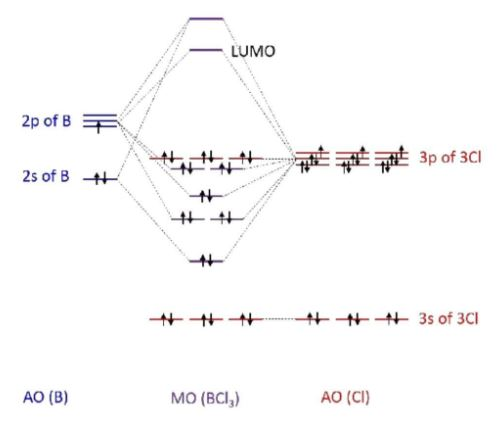

If you'd like to find out which atomic orbitals participate in $\sigma$-bonding, the reducible representation for that is as follows:

$$D_{3h}$$ |  $$E$$ | $$2C_3$$ | $$3C'_2$$ | $$\sigma_h$$ |$$2S_3$$ | $$3\sigma_v$$
 --- | --- | --- | --- | --- | --- | --- 
 $$\Gamma$$ | 3 | 0 | 1 | 3 | 0 | 1

### Something to do

You will soon learn how to write functions, which allow you to permorm a task without having to copy chunks of code. Write a function that takes _any_ character table (so a 2D array containing the data inside, like the variable `d3h`, and a 1D array with the number of operations, like the variable `d3h_operators`) and a reducible representation and returns an array containg the number of times each row of the character table appears in the reducible representation.

## Electronic excitations

You are probably aware that light can excite electrons in molecules from one of the occupied molecular orbitals into one of the unoccupied molecular orbitals, which is what is observed through UV-Vis spectroscopy. What you might not know, however, is that we can predict whether a specific transition will be observed almost entirely with symmetry!

In this case, we will take a look at benzene, which has the $D_{6h}$ point group:

 &nbsp; | $E$ | $2C_6$ | $2C_3$ | $C_2$ | $3C'_2$ | $3C''_2$ | $i$ |$2S_3$ | $2S_6$ | $\sigma_h$ | $3\sigma_d$ | $3\sigma_v$ | linear | quadratic | cubic
 --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- 
$A_{1g}$ | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 | 1 |  | $x^2+y^2$, $z^2$ | 
$A_{2g}$ | 1 | 1 | 1 | 1 | -1 | -1 | 1 | 1 | 1 | 1 | -1 | -1 | $R_z$
$B_{1g}$ | 1 | -1 | 1 | -1 | 1 | -1 | 1 | -1 | 1 | -1 | 1 | -1 |
$B_{2g}$ | 1 | -1 | 1 | -1 | -1 | 1 | 1 | -1 | 1 | -1 | -1 | 1 |
$E_{1g}$ | 2 | 1 | -1 | -2 | 0 | 0 | 2 | 1 | -1 | -2 | 0 | 0 | ($R_x$, $R_y$) | ($xz$, $yz$)
$E_{2g}$ | 2 | -1 | -1 | 2 | 0 | 0 | 2 | -1 | -1 | 2 | 0 | 0 |  | ($x^2-y^2$, $xy$)
$A_{1u}$ | 1 | 1 | 1 | 1 | 1 | 1 | -1 | -1 | -1 | -1 | -1 | -1 |
$A_{2u}$ | 1 | 1 | 1 | 1 | -1 | -1 | -1 | -1 | -1 | -1 | 1 | 1 | z |  | $z^3$, $z(x^2+y^2)$
$B_{1u}$ | 1 | -1 | 1 | -1 | 1 | -1 | -1 | 1 | -1 | 1 | -1 | 1 |  |  | $x(x^2-3y^2$
$B_{2u}$ | 1 | -1 | 1 | -1 | -1 | 1 | -1 | 1 | -1 | 1 | 1 | -1 |  |  | $y(3x^2-y^2)$
$E_{1u}$ | 2 | 1 | -1 | -2 | 0 | 0 | -2 | -1 | 1 | 2 | 0 | 0 | ($x$, $y$) |  | ($xz^2$, $yz^2$), [$x(x^2+y^2)$, $y(x^2+y^2)$]
$E_{2u}$ | 2 | -1 | -1 | 2 | 0 | 0 | -2 | 1 | 1 | -2 | 0 | 0 |  |  | [$xyz$, $z(x^2-y^2)$]

First, prepare this data into a format we can use in the code: create an 2D array of the data inside the character table and a 1D array of the values in the top row (the numbers in front of symmetry operations). Take a look how it was done in the previous part if you need a hint.


Before we can start looking at electronic transitions, we need to know the symmetry labels of the $\pi$ molecular orbitals. Use the reducible representation below to determine these.

&nbsp; | $E$ | $2C_6$ | $2C_3$ | $C_2$ | $3C'_2$ | $3C''_2$ | $i$ |$2S_3$ | $2S_6$ | $\sigma_h$ | $3\sigma_d$ | $3\sigma_v$
 --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- 
 $\Gamma$ | 6 | 0 | 0 | 0 | -2 |  0 | 0 | 0 | 0 | -6 | 0 | 2




Unfortunately, we can't use symmetry to determine which of these labels corresponds to which energy level; we would need to do an energy calculation for that. Here's the energy level diagram:



We will focus on the first electronic transition, that is from the ground-state highest occupied molecular orbital to the lowest unoccupied molecular orbital. First, we need to find the symmetry of this excited state. We can do that by multiplying the following rows of the character table

$$A_{1g} × E_{1g} × E_{2u}$$

Now, check whether the result you obtained is identical to any of the rows of the character table (try using code!). If it isn't, apply the reduction formula as in the previous part.

Does any part of your result correspond to x, y, or z in the character table? If yes, then that transition is optically allowed, and so will appear as a strong band in a UV-Vis spectrum!

Now repeat this process for the next three electronic transitions, which have the rows that need to be multiplied as follows:

$$A_{1g} × E_{1g} × B_{2g}$$
$$A_{1g} × A_{2u} × E_{2u}$$
$$A_{1g} × A_{2u} × B_{2g}$$

Is any of these transitions optically allowed?

Now we have predicted the UV-Vis spectrum of benzene. However, there is one issue: the actual spectrum has 4 bands. This difference is caused by transitions that are simultaneously electronic and vibrational (so-called vibronic transitions). To do that, you will first need to determine the symmetries of the vibrations, which can be done by reducing this reducible representation

&nbsp; | $E$ | $2C_6(z)$ | $2C_3$ | $C_2$ | $3C'_2$ | $3C''_2$ | $i$ |$2S_3$ | $2S_6$ | $\sigma_h$ | $3\sigma_d$ | $3\sigma_v$
 --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- 
 $\Gamma$ | 36 | 0 | 0 | 0 | -4 |  0 | 0 | 0 | 0 | 12 | 0 | 12

 and then subtract $(A_{2g} + E_{1g} + A_{2u} + E_{1u})$ from your result.

 Then, you will need to do the below row multiplications on the rows corresponding to each transition you have calculated. If at least one of the two multiplication results in a symmetry label (i.e. row) that is the same as one of the vibrations, then that transition is vibronically allowed.

$$A_{2u} × \Gamma$$
$$E_{1u} × \Gamma$$

where $\Gamma$ is a row corresponding to the symmetry label of an excited state.

### Something to do

Once you know how to write functions, write a function that takes as arguments any character table (so a 2D array containing the data inside, like the variable d3h, and a 1D array with the number of operations, like the variable d3h_operators) and two values representing the indices (and thus rows) of that character table, and then returns the row(s) of the character table that correspond to the multiplication of the two rows.

# Diffraction analysis

Crystals can adopt a variety of structures, depending on its chemical composition, and the temperature and pressure. Further, the properties of crystalline compounds often depend on its structure, i.e. the unit cell, which makes it important for us chemists to be able determine their structures. One way to do this is with diffraction (such as X-Ray or neutron diffraction). 

In this excercise, we will go through the steps of turning the data obtained from such diffraction into useful information about the unit cell (which is called indexing) without going into the details of why we are doing what we are doing (you'll learn all about that in Y2).

First, we will use the Bragg equation (below) to turn diffraction angles in degrees into distances in angstrom.

$$2d sin\theta = λ$$
*   d is the distance
*   $\theta$ is 
*   $\lambda$ is the wavelength of the particle used in the diffraction

You need to be careful about three things when doing this:
*   The diffraction data is provided as $2\theta$, so you need to divide it by 2 to get the real angle
*   `np.sin()` function takes degrees in radians, so you need to do a unit conversion (have a look on the internet for functions that can do this for you)
*   The wavelength provided is in the units of nm, but we want the $d$ to be in units of A

In [ ]:
diffraction_data = [27.46,   39.22,   48.54,   56.68,   64.10,   71.09,   84.33]
lamda = 1.5418

Now, we need to turn the $d$ values into  $\frac{1}{d^2}$ values. Afterwards, divide all the values by the smalles value.

If all your values are approximately whole numbers, you have your $h^2+k^2+l^2$ values. This already tells us that the unit cell is cubic, but to get more information, we will need to identify the separate values of h, k, and l. To do that, a knowledge of how Miller planes work is required, so I have written a function that takes a single $h^2+k^2+l^2$ and returns an array which looks like this: [h, k, l]. Use it to calculate the h,k,l values corresponding to each of the diffraction angles.

In [2]:
def hkl(const):
    const = np.round(const)
    for h in range(51):
        if h ** 2 > const:
            raise ValueError('h^2 > const; couldn\'t find an appropriate Miller plane')
        
        for k in range(51):
            
            if k ** 2 > const:
                break
            
            l = np.sqrt(const - h ** 2 - k ** 2)
            
            if l % 1 == 0:
                
                temp = [h, k, int(l)]
                temp.sort(reverse=True)
                
                return np.array(temp)

# Don't worry about how the function works, just use like any other function:
print(hkl(9))

[3 0 0]


Now that we have our h,k,l values, we can determine whether the unit cell is primitive, face-centered, or body-centered. First, we will check whether the unit cell is face-centered. A unit cell is face-centered if the h,k,l values corresponding to each of the diffraction angles are all odd or all even.

For example, if our hkl values are `[[1, 1, 1], [2, 0, 0], [2, 2, 0]]`, then the unit cell is face-centered since the h,k,l values corresponding to the first angle are all odd and for the second and third angles they are all even. There are no angle for which this is not true.

Values of `[[1, 1, 1], [2, 0, 0], [2, 1, 0]]`, on the other hand, are not face-centered since the values corresponding to the third angle are neither all odd nor all even.

Now write code that checks whether the unit cell is body-centered. A unit cell is body-centered if the sum $h+k+l$ is always even for all angles.

If the unit cell is neither face-centered nor body-centered, we will consider it to be primitive. In reality, the condition is different (that all possible h,k,l values are present), but if we assume that our data is never defective, the result is the same, and this is much easier (we don't have to do anything after all!).



Lastly, there is one more thing we can learn about the structure from this data; the unit cell length. However, we need to plot and fit the data for that, so I've prepared a function that does that. It takes the $\frac{1}{d^2}$ and the $h^2+k^2+l^2$ values we calculated earlier and returns $\frac{1}{a^2}$, where a is the unit cell length. Use the function and calculate $a$.

In [ ]:
def plot_data(one_over_d_squared, hkl_squared):
    from numpy.polynomial import Polynomial as P
    from numpy.polynomial.polynomial import polyfit
    import matplotlib.pyplot as plt

    hkl_squared = np.round(hkl_squared)
    
    a = polyfit(hkl_squared, one_over_d_squared, 1)[1]
    
    bestfit = P.fit(hkl_squared, one_over_d_squared, 1)
    x, y = bestfit.linspace(domain=[0, bestfit.domain[1]])
    
    fig, ax = plt.subplots(figsize=(6, 6))
    
    ax.scatter(hkl_squared, one_over_d_squared, label='actual data')
    ax.plot(x, y, label='line of best fit')
    
    ax.set_xlim(0)
    ax.set_ylim(0)
    
    ax.set_xlabel(r'$h^{2}$ +' + r' $k^{2}$ +' + r' $l^{2}$', fontsize=15)
    ax.set_ylabel(r'$\frac{1}{d^{2}}$  /$\frac{1}{Å^2}$', fontsize=15)
    
    plt.legend(fontsize=15)
    
    plt.show()
    
    return a

Now repeat the process with the following data. However, this time when you divide $\frac{1}{d^2}$ values by the smallest one, you will get values that are not whole numbers. You will need to find a number that you can multiply all the values by, upon which will all the results will be approximately whole numbers (within 0.03). Try writing code to do this!

In [ ]:
new_diffraction_data = [20.860,   24.132,   34.390,   40.565,   42.454,   49.426,   54.205]
new_lambda = 1.540

### Something to do

Once you know how to write your own functions, try writing one that will do the entire process for you. That way, you can simply call the function each time you have new dataset.

### Something more to do

Try writing a code that goes the opposite way, that is takes a 2D array of h,k,l values, a cell parameter, and wavelength and generates 2Θ diffraction angles. You will need this equation:

$$\frac{1}{d^2} = \frac{h^2+k^2+l^2}{a^2}$$

Even further, you can modify this code to be able to predict the diffraction angles for a tetragonal unit cell given an extra cell parameter. You will need this equation:

$$\frac{1}{d^2} = \frac{h^2+k^2}{a^2}+\frac{l^2}{c^2}$$

as well as this data

```
hkl = [[0, 0, 1], [1, 0, 0], [1, 0, 1], [0, 0, 2], [1, 1, 0], [1, 1, 1], [2, 0, 2]]
a = 3.7732
c = 5.5250
lambda = 1.2
```

